In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
import seaborn as sns 
import plotly.express as ex 
import csv
from functools import reduce
import sklearn.preprocessing
from sklearn.metrics import classification_report 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
from google.colab import files
from keras.models import model_from_json

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
# We will open the dataset.csv file and store it in variable given_dataset 
given_dataset = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CSCI 4931/Programming Assignment 1/dataset.csv")

# This will show the first 10 rows of the data frame. This is to ensure that we are properly opening the file.
given_dataset.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0
1,15797692,Volkova,659,France,Female,33,7,89939.62,1,1,0,136540.09,0
2,15713559,Onyemauchechukwu,473,Germany,Female,32,5,146602.25,2,1,1,72946.95,0
3,15595067,Zhirov,637,Spain,Female,40,6,0.00,2,1,1,181610.60,0
4,15810167,Scott,657,Spain,Male,75,7,126273.95,1,0,1,91673.60,0
5,15730447,Anderson,629,France,Female,49,4,0.00,2,1,1,196335.48,0
6,15597309,Howell,749,Spain,Male,36,7,0.00,2,0,0,80134.65,0
7,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
8,15773949,Cherkasova,692,France,Female,36,3,0.00,2,1,1,8282.22,0
9,15610226,Fenton,614,France,Female,27,9,106414.57,2,0,0,77500.81,0


In [65]:
# We will check if there are any null values in any row in the dataset.csv file.
given_dataset.isnull().sum()
# After running this line, we can see that there is no null values in the dataset.csv file.

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [66]:
# This will print the entire dataset.csv file out. Since we see 9000 rows, we know all the data was read correctly
given_dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0
1,15797692,Volkova,659,France,Female,33,7,89939.62,1,1,0,136540.09,0
2,15713559,Onyemauchechukwu,473,Germany,Female,32,5,146602.25,2,1,1,72946.95,0
3,15595067,Zhirov,637,Spain,Female,40,6,0.00,2,1,1,181610.60,0
4,15810167,Scott,657,Spain,Male,75,7,126273.95,1,0,1,91673.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15770214,Bryant,754,France,Female,27,7,0.00,2,1,0,144134.64,0
8996,15720134,Reynolds,709,Germany,Male,30,9,115479.48,2,1,1,134732.99,0
8997,15700549,Alvares,721,France,Male,54,5,0.00,2,1,1,4493.12,0
8998,15704081,Findlay,595,Germany,Male,30,9,130682.11,2,1,1,57862.88,0


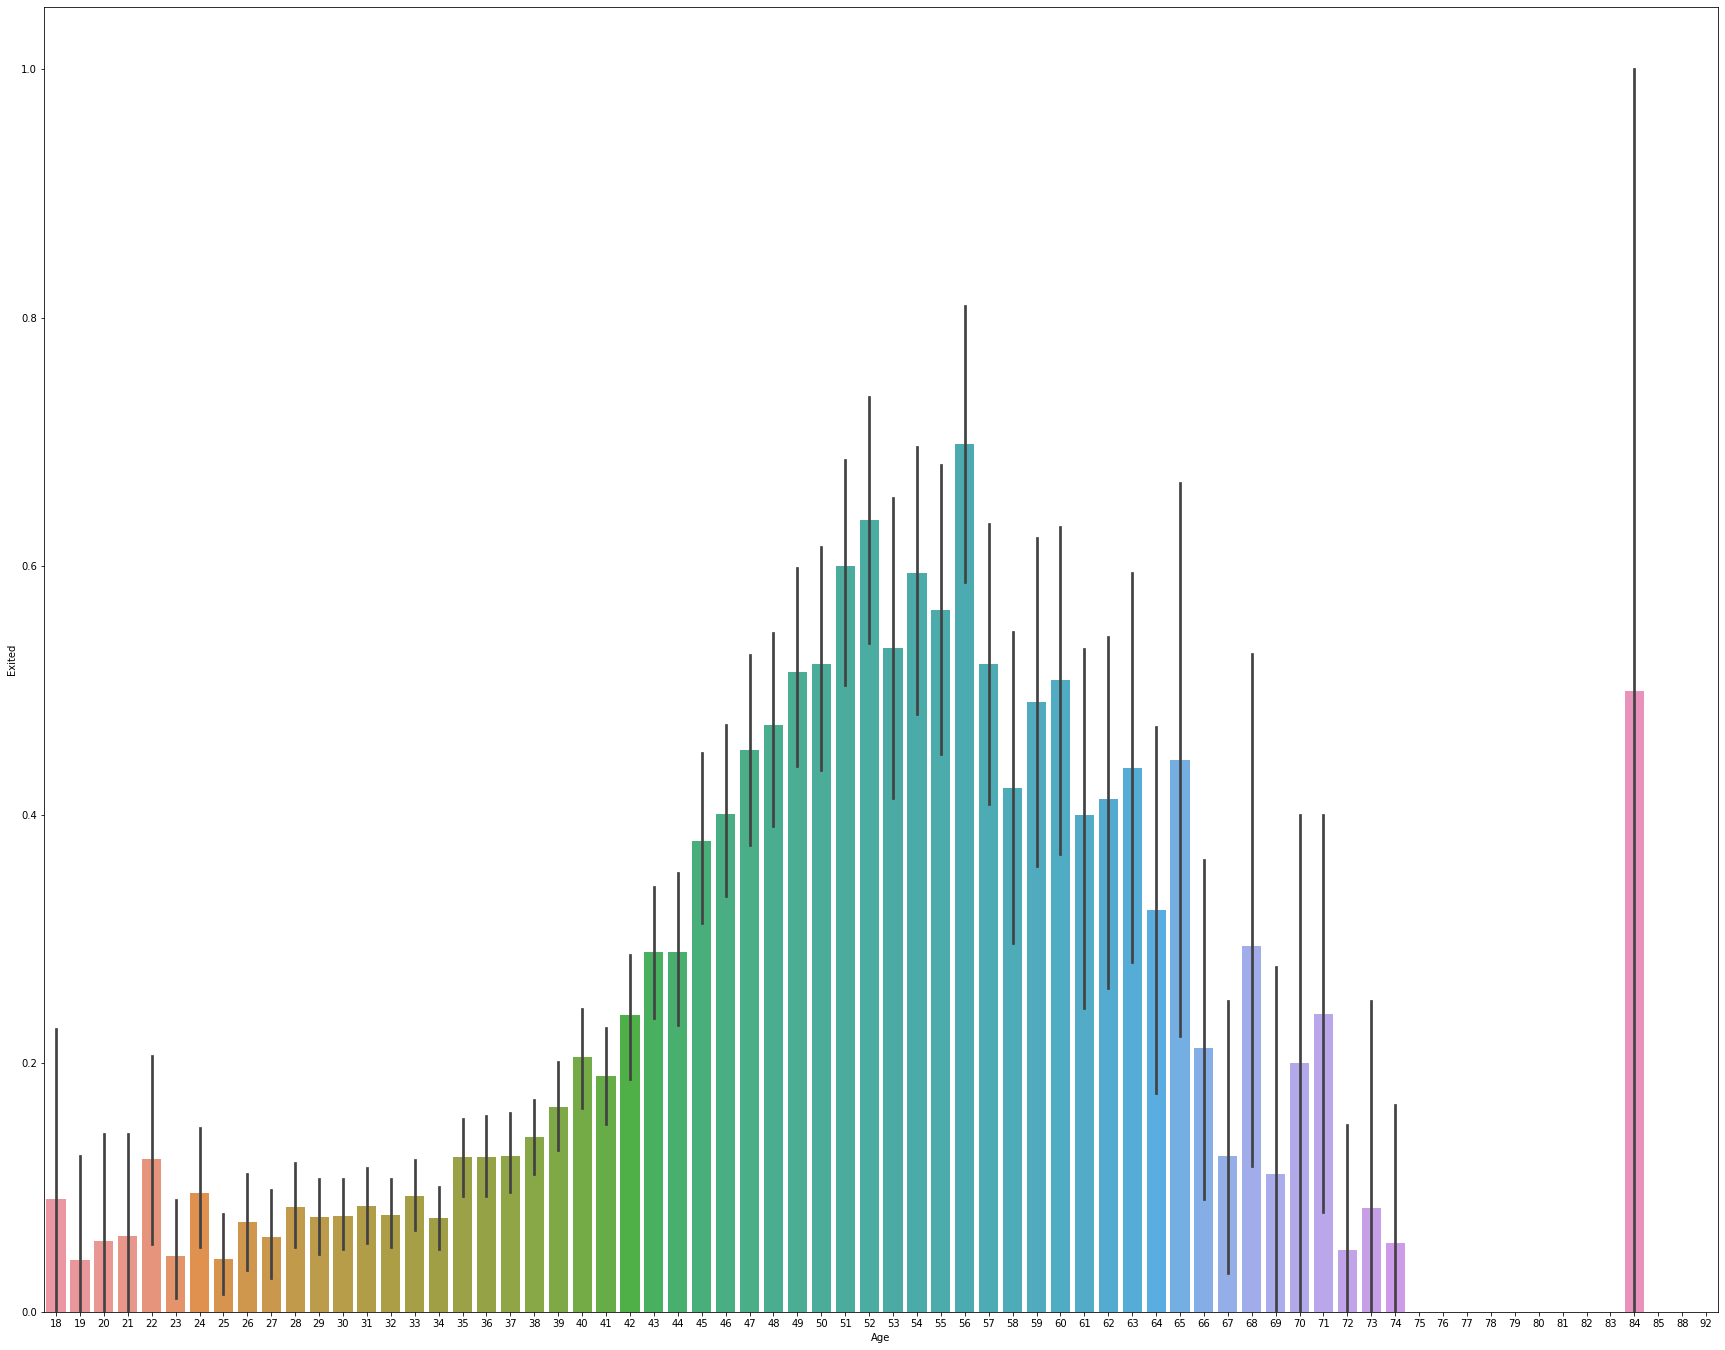

In [67]:
# Will plot the correlation between the Age of customers and customers Exited (stop doing business with the bank)
plt.figure(figsize = (30, 24))
sns.barplot(x = 'Age', y=  'Exited', data = given_dataset)
# Below you can see that customer between the ages 51, 52, 54, and 56 will have a higher chance of stopping business with the bank

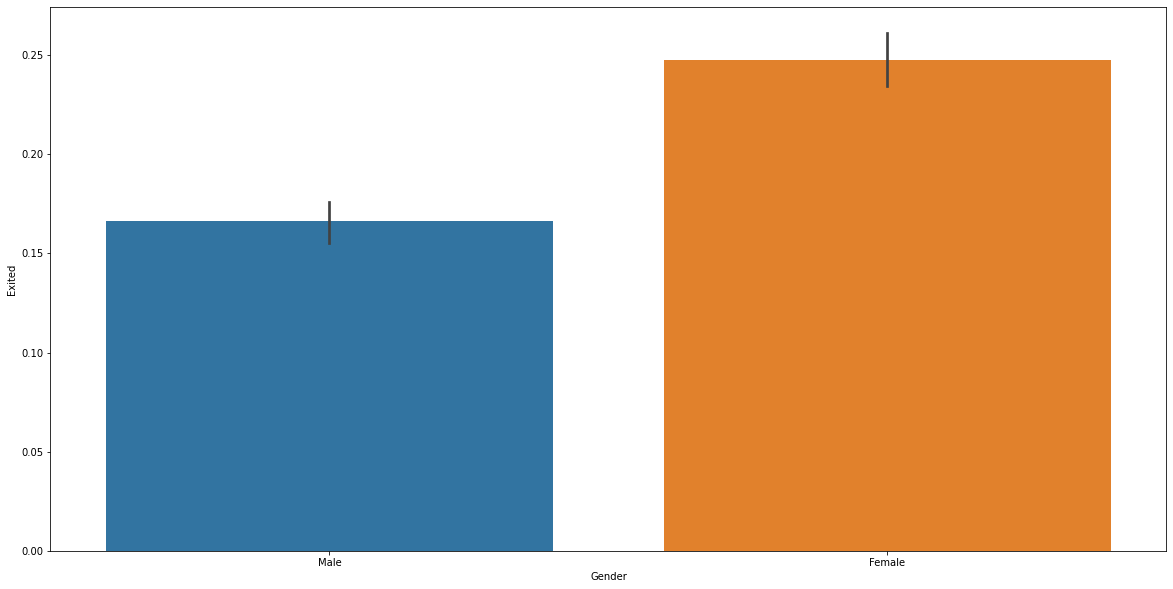

In [68]:
# Will plot the correlation between the Gender of customers and customers Exited (stop doing business with the bank)
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Gender', y=  'Exited', data = given_dataset)
# Below, you can see that females will have a higher chance of stopping business with the bank

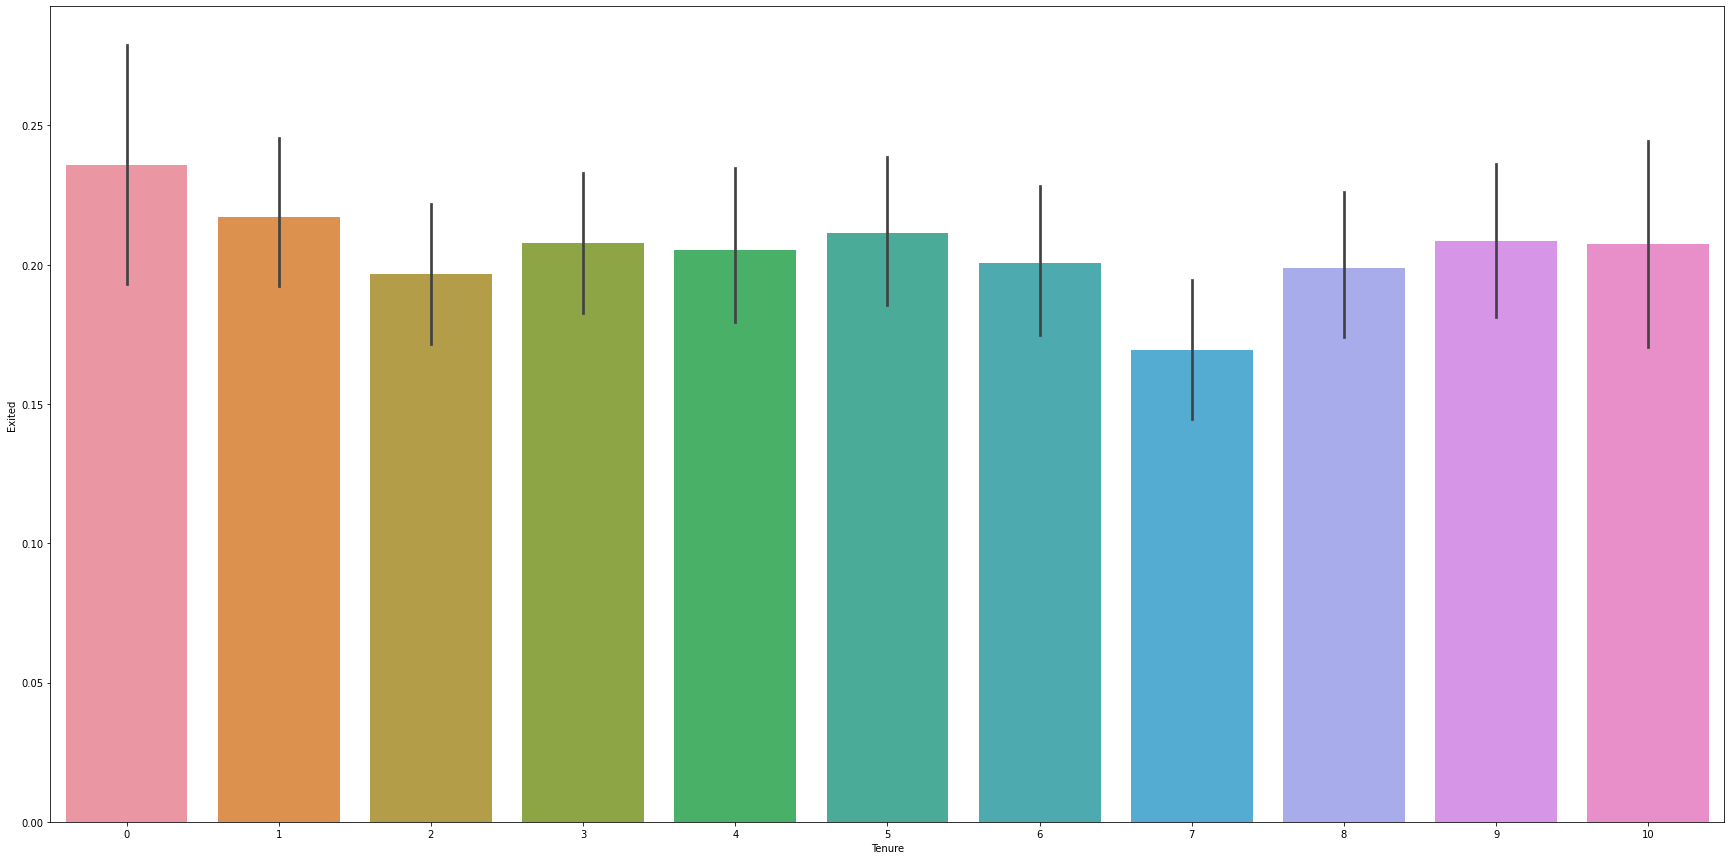

In [69]:
# Will plot the correlation between the Tenure amount and customers Exited (stop doing business with the bank)
plt.figure(figsize = (30, 15))
sns.barplot(x = 'Tenure', y=  'Exited', data = given_dataset)
# Below, you can see that people who have 0 tenures will have a higher chance of stopping business with the bank
# It may look like the amount of tenure someone owns may not have any correlation between customers exiting and not exiting
# But for our purpose, we are keeping the tenure in our training data set

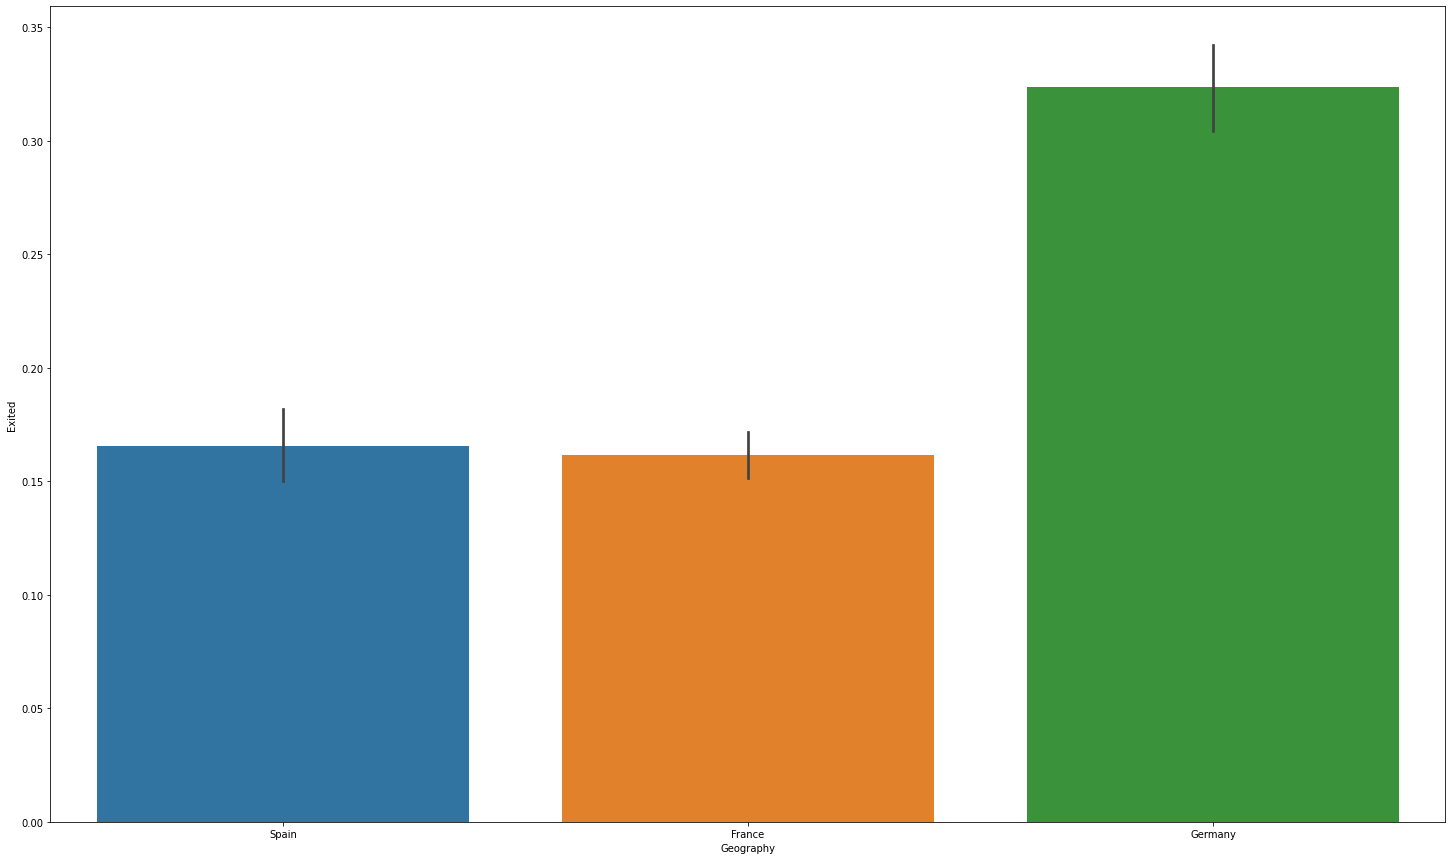

In [70]:
# Will plot the correlation between the Geography of customers and customers Exited (stop doing business with the bank)
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Geography', y=  'Exited', data = given_dataset)
# 0 = Spain, 1 = France, 2 = Germany
# Below, you can see that people who live in Germany will have a higher chance of stopping business with the bank

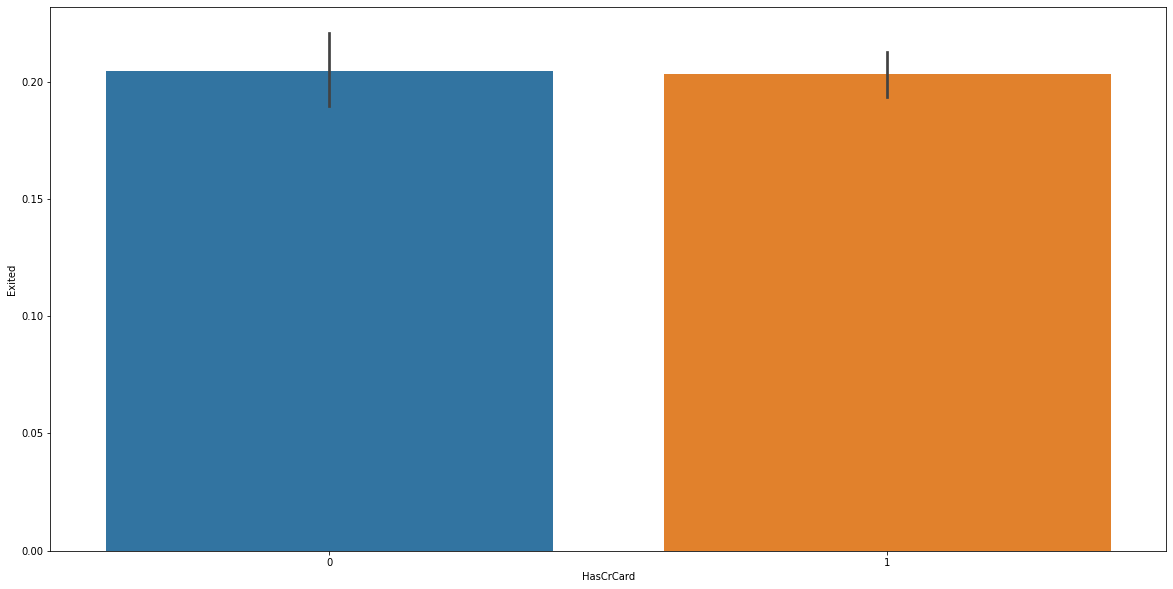

In [71]:
# Will plot the correlation between customers owning a credit card and customers Exited (stop doing business with the bank)
plt.figure(figsize = (20, 10))
sns.barplot(x = 'HasCrCard', y=  'Exited', data = given_dataset)
# Below, you can see that people there is a slightly higher chance of people who does not own a credit card will exit the bank
# over the people who owns credit cards.
# This is very close to being half and half where there may not be any correlation. We will keep it for our training model

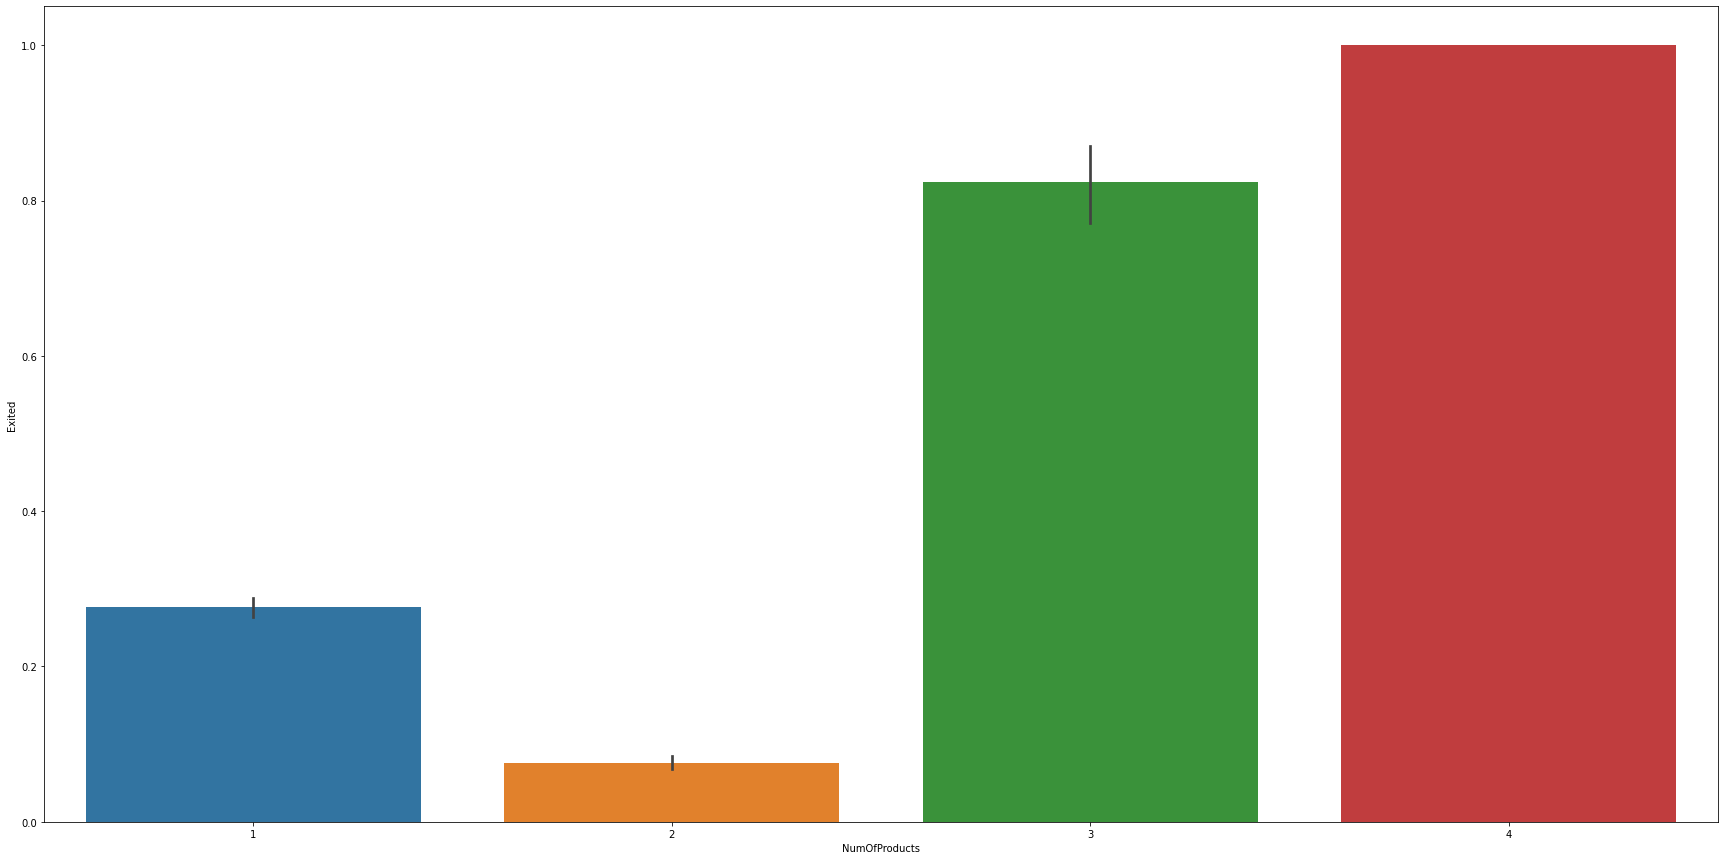

In [72]:
# Will plot the correlation between the Number of Products and customers Exited (stop doing business with the bank)
plt.figure(figsize = (30, 15))
sns.barplot(x = 'NumOfProducts', y=  'Exited', data = given_dataset)
# Below, you can see that people who own 3 or 4 products will have a higher chance of stopping business with the bank

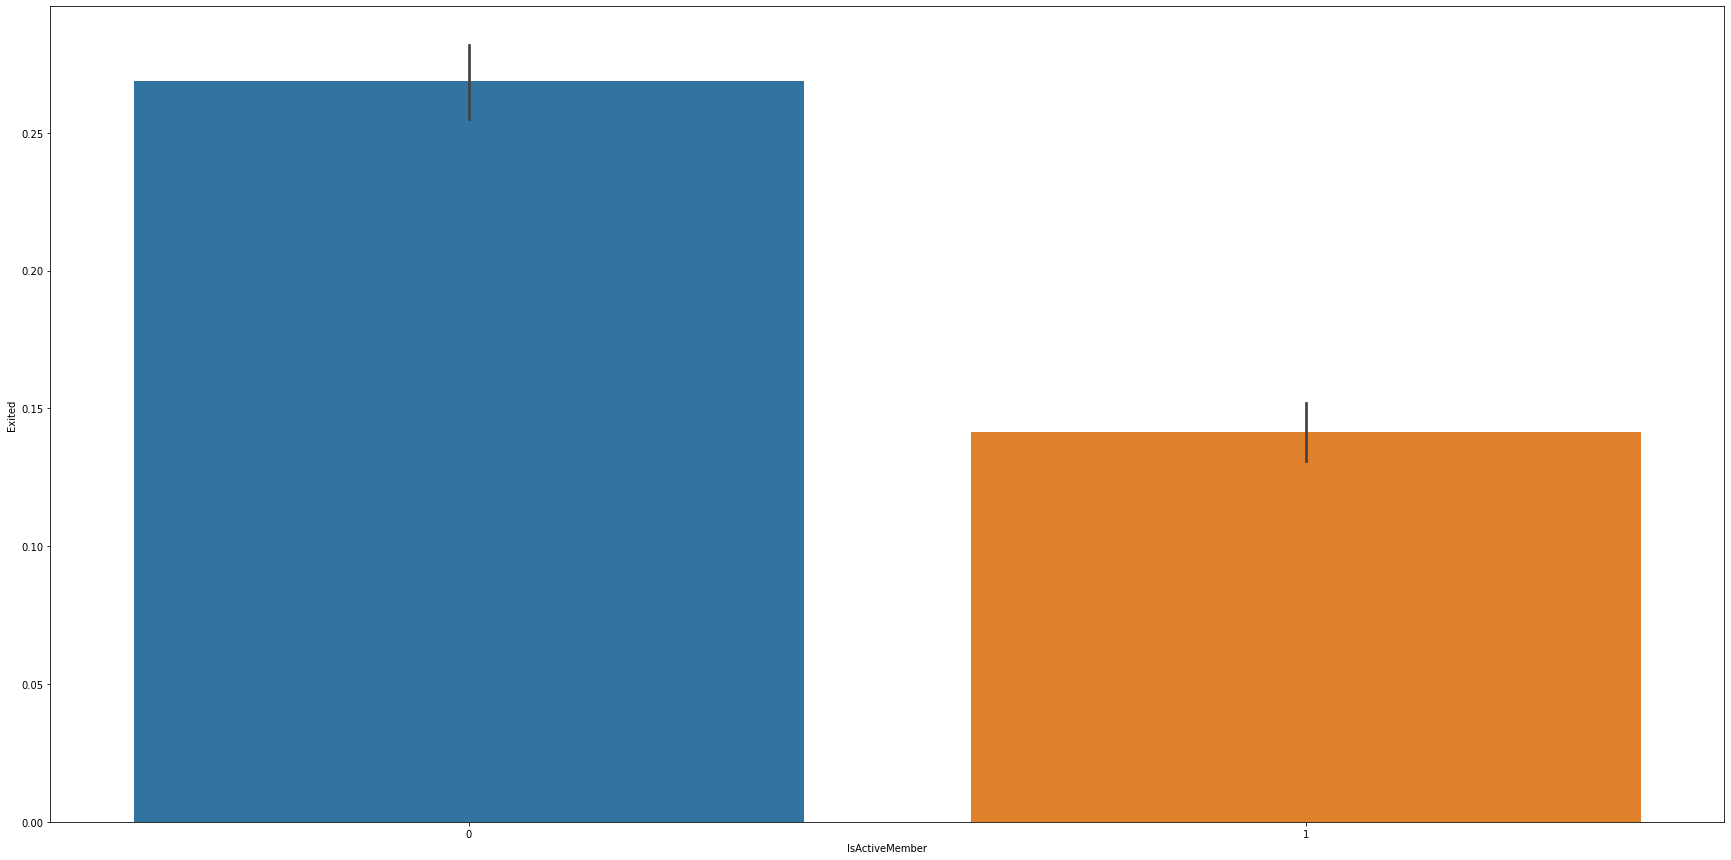

In [73]:
# Will plot the correlation between customers who are active members and customers Exited (stop doing business with the bank)
plt.figure(figsize = (30, 15))
sns.barplot(x = 'IsActiveMember', y=  'Exited', data = given_dataset)
# Below, you can see that people who are not active members will have a higher chance of stopping business with the bank

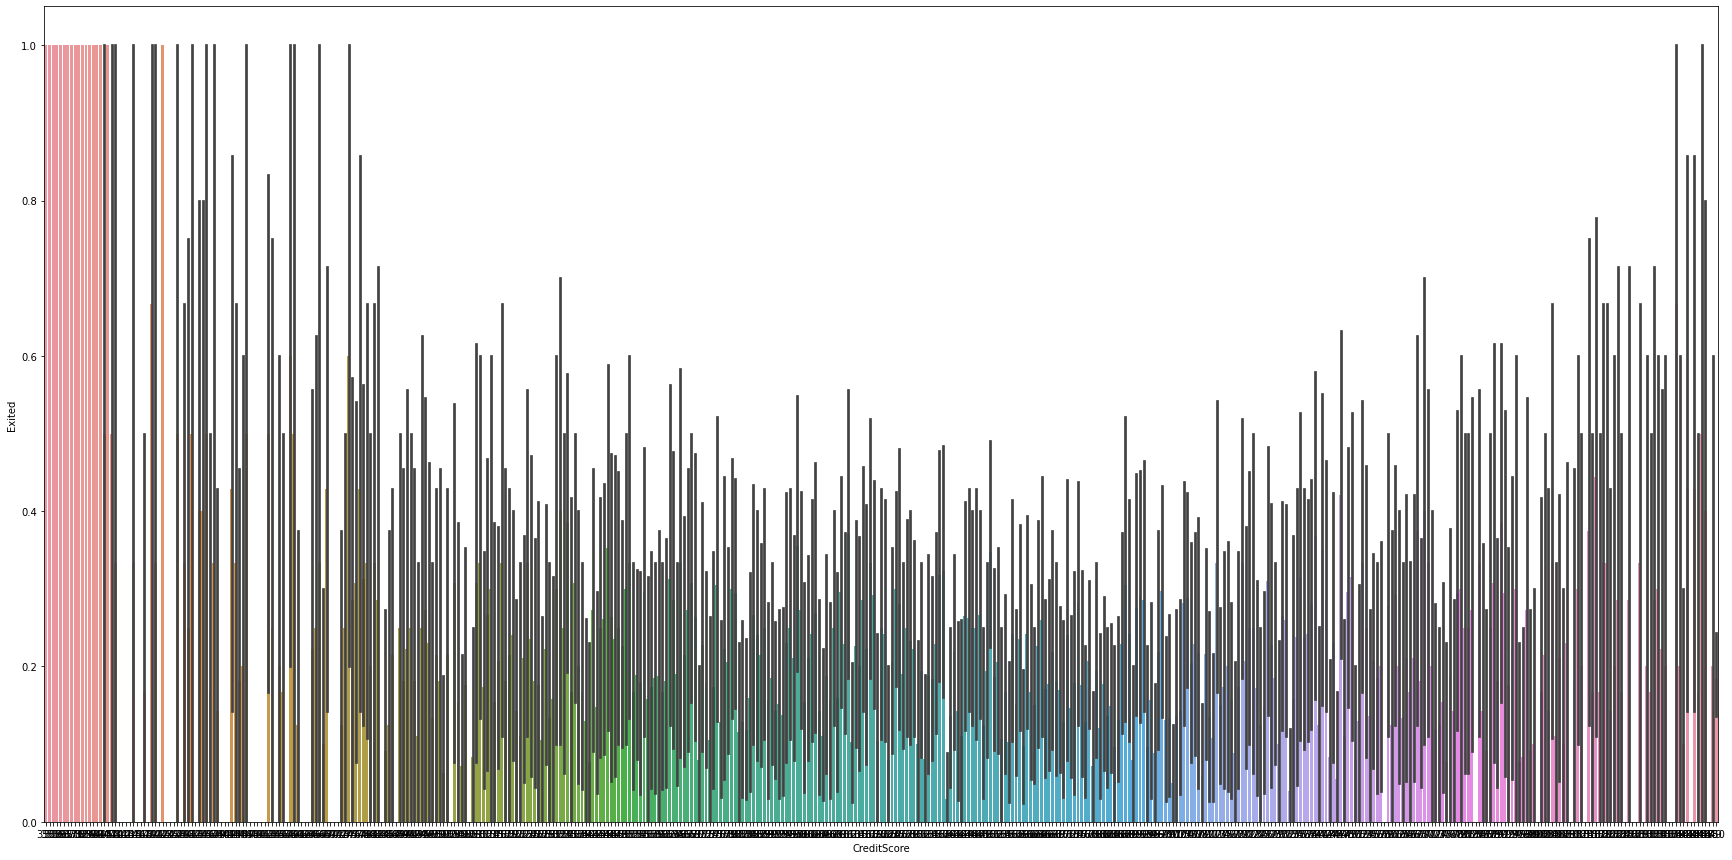

In [74]:
# Will plot the correlation between the customers' credit scores and customers Exited (stop doing business with the bank)
# Cannot plot this because there a lot of different credit scores to plot
plt.figure(figsize = (30, 15))
sns.barplot(x = 'CreditScore', y=  'Exited', data = given_dataset)
# Cannot plot this because there a lot of different credit scores to plot

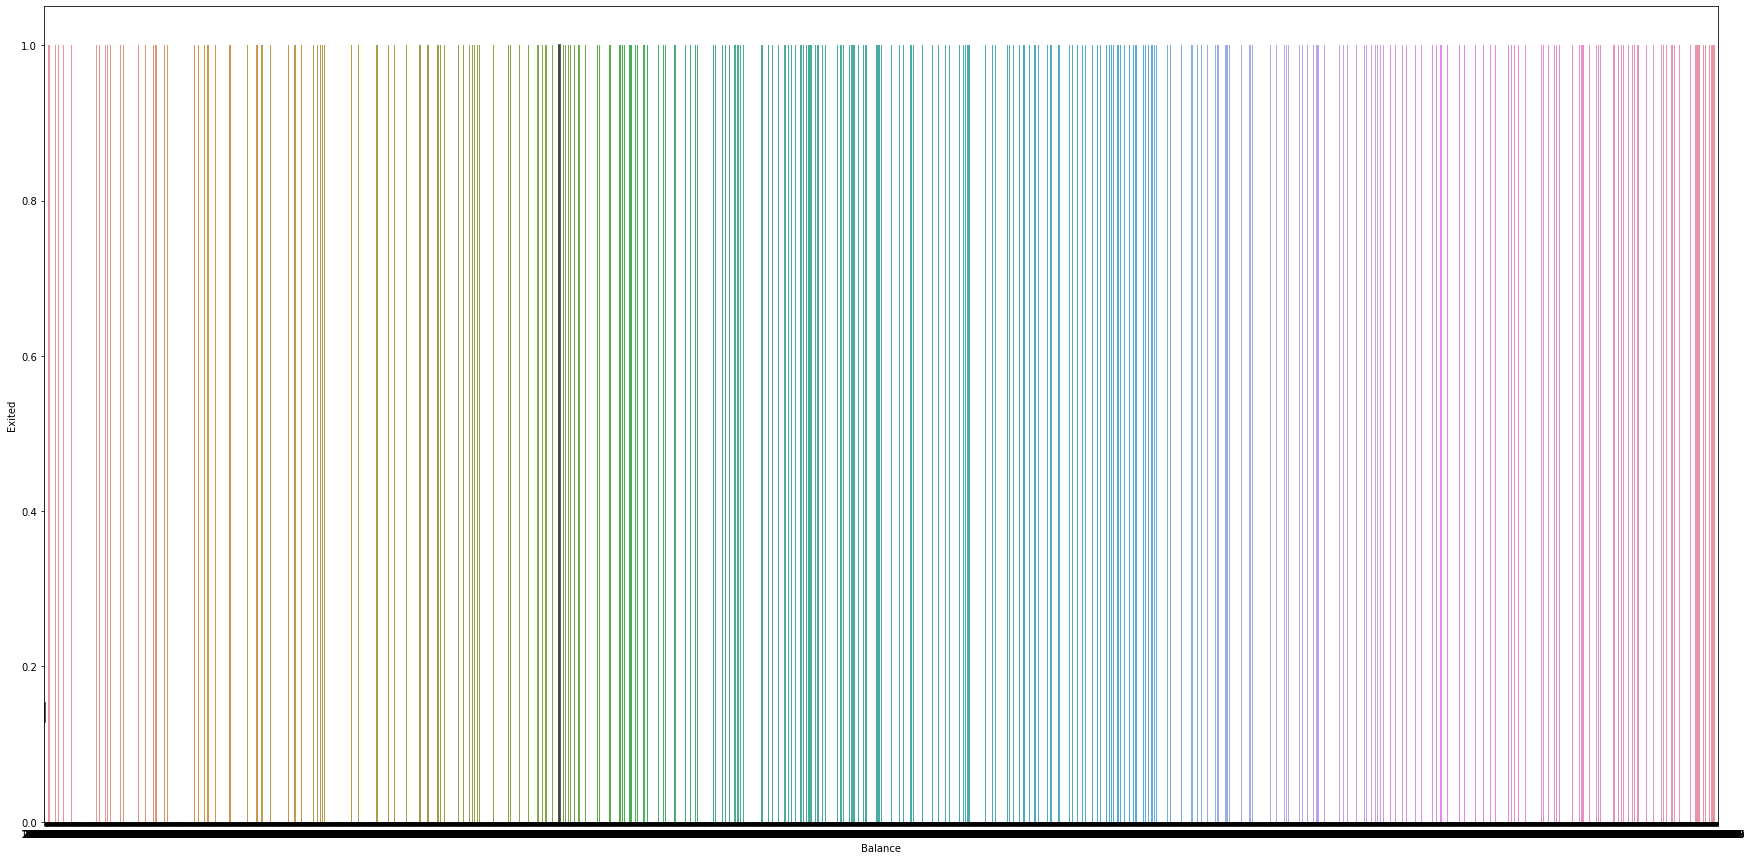

In [75]:
# Will plot the correlation between the customers' balances and customers Exited (stop doing business with the bank)
# Cannot plot this because there a lot of different balances to plot
plt.figure(figsize = (30, 15))
sns.barplot(x = 'Balance', y=  'Exited', data = given_dataset)
# Cannot plot this because there a lot of different balances to plot

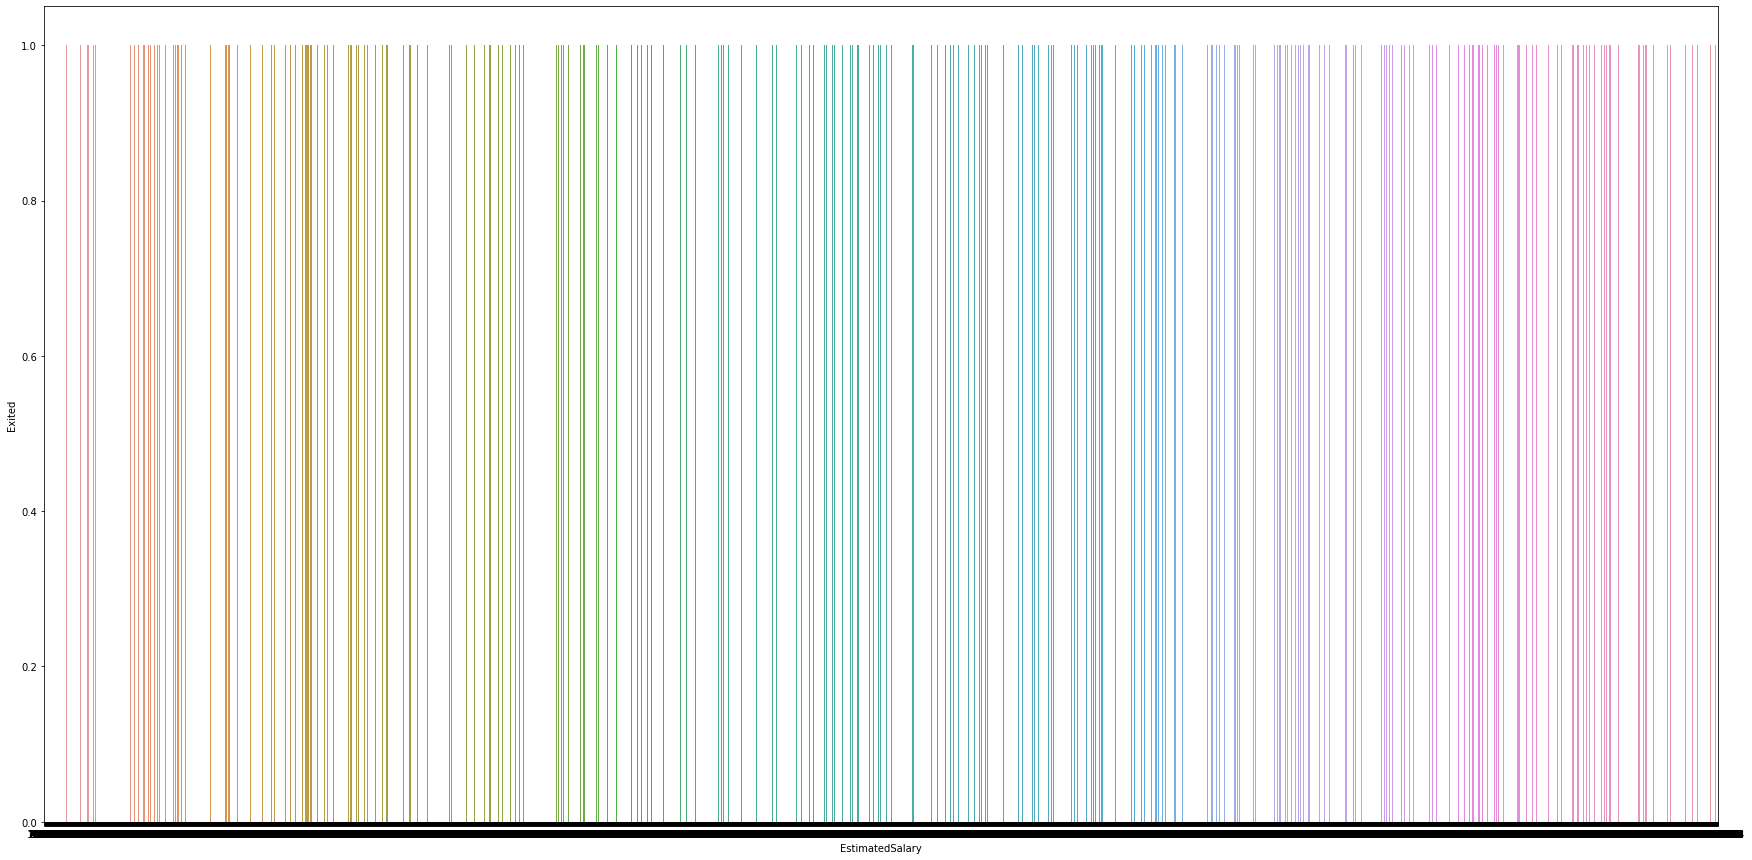

In [76]:
# Will plot the correlation between the customers' estimated salary and customers Exited (stop doing business with the bank)
# Cannot plot this because there a lot of different salaries to plot
plt.figure(figsize = (30, 15))
sns.barplot(x = 'EstimatedSalary', y=  'Exited', data = given_dataset)
# Cannot plot this because there a lot of different salaries to plot

In [77]:
fig = ex.pie(given_dataset, names = 'Exited', title = 'Ratio of customers who exited vs not exited')
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.show()
# The pie chart below shows that about 20.3% of customers stopped doing business while 79.7% continued business with the bank

In [78]:
# This will look through column Gender and change all Males to 0 and all Females to 1
given_dataset.loc[given_dataset['Gender'] == 'Male','Gender'] = 0
given_dataset.loc[given_dataset['Gender'] == 'Female','Gender'] = 1
given_dataset # Makes sure that all genders has been changed to numbers

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647572,Greece,504,Spain,0,34,0,54980.81,1,1,1,136909.88,0
1,15797692,Volkova,659,France,1,33,7,89939.62,1,1,0,136540.09,0
2,15713559,Onyemauchechukwu,473,Germany,1,32,5,146602.25,2,1,1,72946.95,0
3,15595067,Zhirov,637,Spain,1,40,6,0.00,2,1,1,181610.60,0
4,15810167,Scott,657,Spain,0,75,7,126273.95,1,0,1,91673.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15770214,Bryant,754,France,1,27,7,0.00,2,1,0,144134.64,0
8996,15720134,Reynolds,709,Germany,0,30,9,115479.48,2,1,1,134732.99,0
8997,15700549,Alvares,721,France,0,54,5,0.00,2,1,1,4493.12,0
8998,15704081,Findlay,595,Germany,0,30,9,130682.11,2,1,1,57862.88,0


In [79]:
# This will look through column Geography and change all France to 0, all Spain to 1, and all Germany to 2
given_dataset.loc[given_dataset['Geography'] == 'France','Geography'] = 0
given_dataset.loc[given_dataset['Geography'] == 'Spain','Geography'] = 1
given_dataset.loc[given_dataset['Geography'] == 'Germany','Geography'] = 2
given_dataset # Checks to make sure that all geography has been changed to numbers

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647572,Greece,504,1,0,34,0,54980.81,1,1,1,136909.88,0
1,15797692,Volkova,659,0,1,33,7,89939.62,1,1,0,136540.09,0
2,15713559,Onyemauchechukwu,473,2,1,32,5,146602.25,2,1,1,72946.95,0
3,15595067,Zhirov,637,1,1,40,6,0.00,2,1,1,181610.60,0
4,15810167,Scott,657,1,0,75,7,126273.95,1,0,1,91673.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,15770214,Bryant,754,0,1,27,7,0.00,2,1,0,144134.64,0
8996,15720134,Reynolds,709,2,0,30,9,115479.48,2,1,1,134732.99,0
8997,15700549,Alvares,721,0,0,54,5,0.00,2,1,1,4493.12,0
8998,15704081,Findlay,595,2,0,30,9,130682.11,2,1,1,57862.88,0


In [80]:
######## Maybe try to change the name of male, female into binary and location into number corresponding with 1, 2, 3, etc... ########
# Below we will split the dataset.csv into two sets. One set is training set, the other is the testing set.

# This will remove the entire column name "Exited, Surname, and CustomerId" with all of its values for every row.
# We removed this so our scalar.fit_transform() function below will only work with floats and not strings
Given_X = given_dataset.drop(['Exited','Surname','CustomerId'], axis = 1) 
#X = dataset.drop('Surname', axis = 1) # This will remove the entire column name "Surname" with all of its values for every row.
#X = dataset.drop('Geography', axis = 1) # This will remove the entire column name "Surname" with all of its values for every row.
#X = dataset.drop('Gender', axis = 1) # This will remove the entire column name "Surname" with all of its values for every row.
Guess_Y = given_dataset['Exited']
Given_X # This will print the dataset without the values of the Exited 
# Also makes sure that all dat values have been changed into numbers

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,504,1,0,34,0,54980.81,1,1,1,136909.88
1,659,0,1,33,7,89939.62,1,1,0,136540.09
2,473,2,1,32,5,146602.25,2,1,1,72946.95
3,637,1,1,40,6,0.00,2,1,1,181610.60
4,657,1,0,75,7,126273.95,1,0,1,91673.60
...,...,...,...,...,...,...,...,...,...,...
8995,754,0,1,27,7,0.00,2,1,0,144134.64
8996,709,2,0,30,9,115479.48,2,1,1,134732.99
8997,721,0,0,54,5,0.00,2,1,1,4493.12
8998,595,2,0,30,9,130682.11,2,1,1,57862.88


In [81]:
Guess_Y # This will print all the values for Exited

0       0
1       0
2       0
3       0
4       0
       ..
8995    0
8996    0
8997    0
8998    0
8999    1
Name: Exited, Length: 9000, dtype: int64

In [82]:
# We will split the dataset.csv into training and testing sets. Training will have 80% of the file randomized.
# Testing will have 20% of the file that was not used.
x_train, x_test, y_train, y_test = train_test_split(Given_X, Guess_Y, test_size = 0.20, random_state = 37)
x_train # This will display the 80% of the randomized rows that will be used to train the ANN

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7106,679,0,0,48,8,0.00,2,1,0,23344.94
3380,661,0,0,41,5,0.00,1,0,1,88279.60
1446,675,1,0,36,9,106190.55,1,0,1,22994.32
2304,623,1,1,43,4,123536.52,2,0,0,154908.52
3532,635,0,0,42,1,146766.72,2,0,1,164357.10
...,...,...,...,...,...,...,...,...,...,...
5795,625,1,1,31,8,0.00,2,1,0,151843.54
4118,658,0,0,36,8,174060.46,1,1,1,94925.62
988,545,0,0,23,2,0.00,2,1,0,189613.12
4459,699,0,0,64,9,113109.52,1,1,0,27980.80


In [83]:
x_test # This will display the 20% of the randomized rows that will be used to test the ANN

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7472,590,0,0,41,1,89086.31,1,1,0,24499.97
6459,693,0,1,35,5,124151.09,1,1,0,88705.14
4760,599,2,0,61,1,124737.96,1,0,1,90389.61
5182,692,1,1,47,3,0.00,2,1,0,150802.41
5588,789,0,1,27,8,66201.96,1,1,1,79458.12
...,...,...,...,...,...,...,...,...,...,...
4857,644,0,0,37,2,186347.97,2,1,0,92809.73
316,570,0,1,29,4,153040.03,1,1,1,131363.57
3152,724,0,0,30,10,0.00,2,1,1,54265.55
5157,500,2,0,30,2,125495.64,2,1,1,68807.47


In [84]:
#Get_Numeric = preprocessing.LabelEncoder()
#Get_Numeric.fit(x_train)

# Define min max scaler from the import file and save it to variable scaler
scaler = MinMaxScaler()
# We will transform data for x_train
x_given_train_scaler = scaler.fit_transform(x_train)
x_given_train_scaler 

array([[0.658     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.11633111],
       [0.622     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.44116292],
       [0.65      , 0.5       , 0.        , ..., 0.        , 1.        ,
        0.11457716],
       ...,
       [0.39      , 0.        , 0.        , ..., 1.        , 0.        ,
        0.94807786],
       [0.698     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.13952173],
       [0.774     , 1.        , 0.        , ..., 1.        , 1.        ,
        0.37418513]])

In [85]:
#Get_Numeric = preprocessing.LabelEncoder()
#Get_Numeric.fit(x_test)

# Define min max scaler from the import file and save it to variable scaler
scaler = MinMaxScaler()
# We will transform data for x_test
x_given_test_scaler = scaler.fit_transform(x_test)
x_given_test_scaler

array([[0.48      , 0.        , 0.        , ..., 1.        , 0.        ,
        0.12221594],
       [0.686     , 0.        , 1.        , ..., 1.        , 0.        ,
        0.44370171],
       [0.498     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.45213613],
       ...,
       [0.748     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.27125706],
       [0.3       , 1.        , 0.        , ..., 1.        , 1.        ,
        0.34407083],
       [0.59      , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [86]:
"""
# This is needed
x_train_scaled = np.asarray(x_train_scaled).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test_scaled = np.asarray(x_test_scaled).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
"""

# This is the original model. I have made multiple different architectures to see which one makes the highest accuracy.
# This is my ANN model that will use 12 layers and decreases the neuron amount by 2 in each layer until last layer has 1 neuron
Nick_ANN_Model = keras.Sequential(#name = 'Nick_ANN_Model'
    [
        layers.Dense(units = 23, activation = 'sigmoid', kernel_initializer = 'he_uniform', name = 'sigmoid_layer1'),
        layers.Dense(units = 21, activation = 'sigmoid',  name = 'sigmoid_layer2'),
        layers.Dense(units = 19, activation = 'relu',  name = 'relu_layer3'),
        layers.Dense(units = 17, activation = 'relu', kernel_initializer = 'he_uniform', name = 'relu_layer4'),
        layers.Dense(units = 15, activation = 'relu', kernel_initializer = 'he_uniform', name = 'relu_layer5'),
        layers.Dense(units = 13, activation = 'sigmoid', kernel_initializer = 'he_uniform', name = 'sigmoid_layer6'),
        layers.Dense(units = 11, activation = 'relu', name = 'relu_layer7'),
        layers.Dense(units = 9, activation = 'sigmoid', name = 'sigmoid_layer8'),
        layers.Dense(units = 7, activation = 'sigmoid', kernel_initializer = 'he_uniform', name = 'sigmoid_layer9'),
        layers.Dense(units = 5, activation = 'relu', kernel_initializer = 'he_uniform', name = 'relu_layer10'),
        layers.Dense(units = 3, activation = 'sigmoid', name = 'sigmoid_layer11'),
        layers.Dense(units = 1, activation = 'sigmoid', name = 'sigmoid_layer12')
    ] # 87% is the highest currently
)  

# This will help us evaluate our training model.
metrics_evaluation = []
metrics_evaluation
[
  keras.metrics.Precision(name = 'Precision'),
  keras.metrics.Recall(name = 'Recall'),
  keras.metrics.Accuracy(name = 'accuracy'),
]


# We need this to complete question 3 of programming assignment 1
Nick_ANN_Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
# The original is batch_size = 2, validation_split = 0.20, epochs = 150
Nick_ANN_Model.fit(x = x_given_train_scaler, y = y_train, batch_size = 5, validation_split = 0.20, epochs = 150)


Epoch 1/150
1152/1152 [==============================] - 4s 2ms/step - loss: 0.5413 - accuracy: 0.8015 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4940 - val_accuracy: 0.8049 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
1152/1152 [==============================] - 2s 2ms/step - loss: 0.5020 - accuracy: 0.7991 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4938 - val_accuracy: 0.8049 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
1152/1152 [==============================] - 2s 2ms/step - loss: 0.4985 - accuracy: 0.8015 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4944 - val_accuracy: 0.8049 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/150
1152/1152 [==============================] - 2s 2ms/step - loss: 0.5215 - accuracy: 0.7844 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4936 - val_accuracy: 0.8049 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/150
1152/1152 [=====

In [87]:
# Prints the summary of my ANN model.
Nick_ANN_Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sigmoid_layer1 (Dense)       (5, 23)                   253       
_________________________________________________________________
sigmoid_layer2 (Dense)       (5, 21)                   504       
_________________________________________________________________
relu_layer3 (Dense)          (5, 19)                   418       
_________________________________________________________________
relu_layer4 (Dense)          (5, 17)                   340       
_________________________________________________________________
relu_layer5 (Dense)          (5, 15)                   270       
_________________________________________________________________
sigmoid_layer6 (Dense)       (5, 13)                   208       
_________________________________________________________________
relu_layer7 (Dense)          (5, 11)                  

In [88]:
# Could not find an import for f1-score so I made a def to evaluate the f1-score using precision and recall data provided.
f1_score = 0
# This will evaluate the f1-score for both test and train sets and returns the f1-score to be printed.
def get_f1_score(Precision, Recall):
  # If both precision and recall is 0, set the f1-score to 0
  if(Precision == 0 and Recall == 0):
    f1_score = 0
    return f1_score
  # If precision or recall is not 0, calculate f1-score
  else:
    f1_score = 2 * (Precision * Recall) / (Precision + Recall)
    return f1_score

# Evaluates and returns the data for accuracy, precision, and recall on the training set.
loss, Accuracy, Precision, Recall = Nick_ANN_Model.evaluate(x = x_given_train_scaler, y = y_train, verbose=1, batch_size = 5)

# Evaluates and returns the data for accuracy, precision, and recall on the test set.
val_loss, val_Accuracy, val_Precision, val_Recall = Nick_ANN_Model.evaluate(x = x_given_test_scaler, y = y_test, verbose=1, batch_size = 5)

#print(type(Precision))

# The 6 print statement below will print out loss, accuracy, recall, precision, and f1_score for the training set.
print("\nBelow is my classification report by evaluating my training model.")
print("For evaluation, this is loss:", loss)
print("For evaluation, this is accuracy:", Accuracy)
print("For evaluation, this is recall:", Recall)
print("For evaluation, this is precision:", Precision)
print("For evaluation, this is f1_score:", get_f1_score(Precision, Recall))

# The 6 print statement below will print out loss, accuracy, recall, precision, and f1_score for the test set.
print("\nBelow is my classification report by evaluating my testing model.")
print("For evaluation, this is loss:", val_loss)
print("For evaluation, this is accuracy:", val_Accuracy)
print("For evaluation, this is recall:", val_Recall)
print("For evaluation, this is precision:", val_Precision)
print("For evaluation, this is f1_score:", get_f1_score(val_Precision, val_Recall))

Nick_ANN_Model.metrics_names # Prints out the metrics names.
#Nick_ANN_Model.metrics


360/360 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8483 - precision: 0.7229 - recall: 0.4688

Below is my classification report by evaluating my training model.
For evaluation, this is loss: 0.32921943068504333
For evaluation, this is accuracy: 0.8656944632530212
For evaluation, this is recall: 0.4215618669986725
For evaluation, this is precision: 0.8243243098258972
For evaluation, this is f1_score: 0.5578418021272076

Below is my classification report by evaluating my testing model.
For evaluation, this is loss: 0.372999906539917
For evaluation, this is accuracy: 0.8483333587646484
For evaluation, this is recall: 0.46875
For evaluation, this is precision: 0.7228915691375732
For evaluation, this is f1_score: 0.5687203800358815


['loss', 'accuracy', 'precision', 'recall']

In [89]:
# We will run our model and have it predict whether the customers exited using our 20% test set.
Prediction = Nick_ANN_Model.predict(x_given_test_scaler) # Will predict if the customers exit or not
Get_Round_Prediction = Prediction.round() # Rounds the predictions up to 0 or 1. Before, the predictions returned floats.
Display_Prediction_Not_Exited = sum(Get_Round_Prediction == 0) # Gets the total amount of 0's predicted
Display_Actual_Not_Exit = sum(y_test == 0) # Gets the total amount of 0's predicted

# Prints the predicted and actual 0's from the test set
print("This is Predicted Not Exited:", Display_Prediction_Not_Exited)
print("This is Actual Not Exited:", Display_Actual_Not_Exit)

This is Predicted Not Exited: [1551]
This is Actual Not Exited: 1416


In [90]:
# We will run our model and have it predict whether the customers exited using our 20% test set.
#Prediction = Nick_ANN_Model.predict(x_test_scaled) # Will predict if the customers exit or not
Display_Prediction_Exited = sum(Get_Round_Prediction == 1) # Rounds the predictions up to 0 or 1. Before, the predictions returned floats.
Display_Actual_Exit = sum(y_test == 1) # Gets the total amount of 1's predicted

# Prints the predicted and actual 1's from the test set
print("This is Predicted Exited:", Display_Prediction_Exited)
print("This is Actual Exited:", Display_Actual_Exit)

This is Predicted Exited: [249]
This is Actual Exited: 384


In [91]:
# This will print the classification report. We will care about the accuracy.
# The highest accuracy I was able to get is 87% so far
print(classification_report(y_test,Get_Round_Prediction))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1416
           1       0.72      0.47      0.57       384

    accuracy                           0.85      1800
   macro avg       0.80      0.71      0.74      1800
weighted avg       0.84      0.85      0.84      1800



In [92]:
# Save our training model to JSON file to be loaded later on. It will be loaded onto our test-code.ipynb
Save_Nick_ANN_Model = Nick_ANN_Model.to_json()
with open("Nick_ANN_Model.json", "w") as json_file:
    json_file.write(Save_Nick_ANN_Model)
files.download("Nick_ANN_Model.json")
print("Training model saved sucessfully.")
# Save our weights to be loaded later on. It will be loaded onto our test-code.ipynb
Nick_ANN_Model.save_weights("Nick_ANN_Model.h5")
files.download("Nick_ANN_Model.h5")
print("Weights from the training model saved sucessfully.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training model saved sucessfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Weights from the training model saved sucessfully.
